In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# importing linear regression function
import sklearn.linear_model as lm

# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

%matplotlib inline

# Load data
df = pd.read_csv('Data/Grade_Set_1.csv')
print df

# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')
plt.show()
# check the correlation between variables
print("Correlation Matrix: ")
df.corr()

# Lets plot the distribution
fit = stats.norm.pdf(df.Test_Grade, np.mean(df.Test_Grade), np.std(df.Test_Grade))  
plt.plot(df.Test_Grade,fit,'-o')
plt.hist(df.Test_Grade,normed=True)     
plt.show() 

Loading data 

In [5]:
df = pd.read_csv('./data/Grade_Set_1.csv')
df


,Hours_Studied,Test_Grade
0,2,57
1,3,66
2,4,73
3,5,76
4,6,79
5,7,81
6,8,90
7,9,96
8,10,100


Let's plot scatter plot 

In [7]:
df.keys()

Index(['Hours_Studied', 'Test_Grade'], dtype='object')

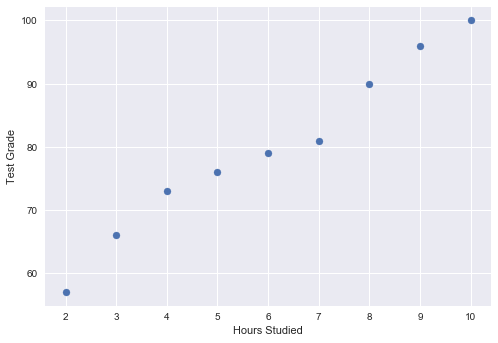

In [12]:
# plt.style.use('seaborn')
plt.scatter(df['Hours_Studied'], df['Test_Grade'])
plt.xlabel('Hours Studied')
plt.ylabel('Test Grade')
plt.show()

**Co-relation Matrix**

In [13]:
df.corr()

,Hours_Studied,Test_Grade
Hours_Studied,1.000000,0.987797
Test_Grade,0.987797,1.000000


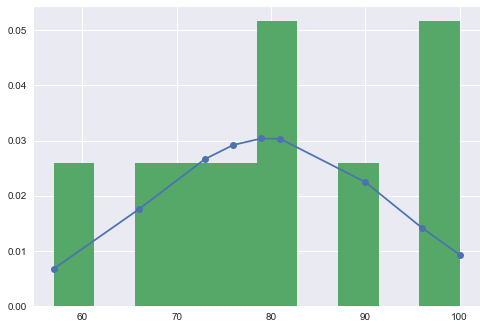

In [14]:
# Lets plot the distribution
fit = stats.norm.pdf(df.Test_Grade, np.mean(df.Test_Grade), np.std(df.Test_Grade))  
plt.plot(df.Test_Grade,fit,'-o')
plt.hist(df.Test_Grade,normed=True)     
plt.show() 

In [16]:
df.keys()

Index(['Hours_Studied', 'Test_Grade'], dtype='object')

In [17]:
# Create linear regression object
lr = lm.LinearRegression()

x= df.Hours_Studied[:, np.newaxis] # independent variable
y= df.Test_Grade.values            # dependent variable 


In [21]:
# Train the model using the training sets
lr.fit(x, y)
print("Intercept: ", lr.intercept_)
print("Coefficient: ", lr.coef_)


Intercept:  49.67777777777776
Coefficient:  [5.01666667]


Using predict function:  [79.77777778]


Text(0.5,0,'Hours_Studied')

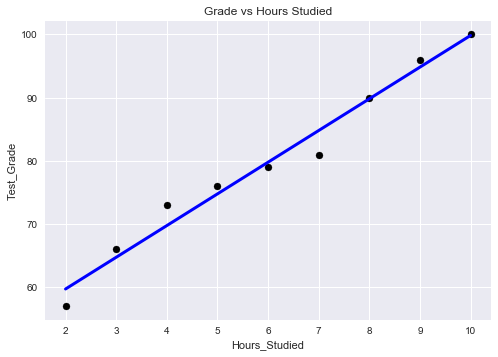

In [22]:
# predict using the built-in function
print("Using predict function: ", lr.predict(6))

# plotting fitted line
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')

In [23]:
# Let's check the performance of fitted model through R-squared

# add predict value to the data frame
df['Test_Grade_Pred'] = lr.predict(x)

In [24]:
df

,Hours_Studied,Test_Grade,Test_Grade_Pred
0,2,57,59.711111
1,3,66,64.727778
2,4,73,69.744444
3,5,76,74.761111
4,6,79,79.777778
5,7,81,84.794444
6,8,90,89.811111
7,9,96,94.827778
8,10,100,99.844444


In [25]:
# Manually calculating R Squared
df['SST'] = np.square(df['Test_Grade'] - df['Test_Grade'].mean())
df['SSR'] = np.square(df['Test_Grade_Pred'] - df['Test_Grade'].mean())

print("Sum of SSR:", df['SSR'].sum())
print("Sum of SST:", df['SST'].sum())



Sum of SSR: 1510.0166666666673
Sum of SST: 1547.5555555555557


In [26]:
print(df)
df.to_csv('r-squared.csv', index=False)

print("R Squared using manual calculation: ", df['SSR'].sum() / df['SST'].sum())

# Using built-in function
print("R Squared using built-in function: ", r2_score(df.Test_Grade,  df.Test_Grade_Pred))
print("Mean Absolute Error: ", mean_absolute_error(df.Test_Grade, df.Test_Grade_Pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Test_Grade, df.Test_Grade_Pred)))

   Hours_Studied  Test_Grade  Test_Grade_Pred         SST         SSR
0              2          57        59.711111  518.827160  402.671111
1              3          66        64.727778  189.827160  226.502500
2              4          73        69.744444   45.938272  100.667778
3              5          76        74.761111   14.271605   25.166944
4              6          79        79.777778    0.604938    0.000000
5              7          81        84.794444    1.493827   25.166944
6              8          90        89.811111  104.493827  100.667778
7              9          96        94.827778  263.160494  226.502500
8             10         100        99.844444  408.938272  402.671111
R Squared using manual calculation:  0.9757431074095351
R Squared using built-in function:  0.9757431074095347
Mean Absolute Error:  1.618518518518523
Root Mean Squared Error:  2.0422995995497297


In [ ]:
import statsmodels.api as sm